In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/sec1worstcase.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']]
sec1 = sec1.dropna()
print(sec1.shape)
sec1new = np.array(sec1)
sec1new = pd.DataFrame(sec1new)
sec1new.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
sec1new

(987, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
0,3/1/2012,78.789,109.27,654,406
1,3/2/2012,79.403,107.17,655,411
2,3/5/2012,79.3,107.18,660.75,409
3,3/6/2012,79.866,105.21,654,425
4,3/7/2012,79.712,106.65,638.75,430
5,3/8/2012,79.139,107.06,635.5,430
6,3/9/2012,80.041,107.87,645,429
7,3/12/2012,79.89,106.84,659.5,433
8,3/13/2012,80.193,107.24,662,431
9,3/14/2012,80.565,105.95,658.75,430


In [39]:
X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=200, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 80.548, test: 326.213
R^2 train: 0.983, test: 0.929


In [40]:
forest.feature_importances_

array([ 0.24587541,  0.09344744,  0.66067715])

In [41]:
ureapredicted = forest.predict(X)
ureapredicted = pd.DataFrame(ureapredicted)
ureapredicted.columns = ['Predicted Urea_Sec1_Suggest']
ureapredicted

,Predicted Urea_Sec1_Suggest
0,414.585000
1,420.280083
2,427.435601
3,429.938310
4,446.065000
5,441.019000
6,477.325000
7,433.524794
8,431.123633
9,424.955865


In [42]:
#how to add a new column, predicted urea
sec1new['Predicted Urea_Sec1_Suggest'] = ureapredicted
sec1new

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest
0,3/1/2012,78.789,109.27,654,406,414.585000
1,3/2/2012,79.403,107.17,655,411,420.280083
2,3/5/2012,79.3,107.18,660.75,409,427.435601
3,3/6/2012,79.866,105.21,654,425,429.938310
4,3/7/2012,79.712,106.65,638.75,430,446.065000
5,3/8/2012,79.139,107.06,635.5,430,441.019000
6,3/9/2012,80.041,107.87,645,429,477.325000
7,3/12/2012,79.89,106.84,659.5,433,433.524794
8,3/13/2012,80.193,107.24,662,431,431.123633
9,3/14/2012,80.565,105.95,658.75,430,424.955865


## Want to Compare Monthly

In [43]:
#monthly predictions
may_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][0:22]
jun_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][22:42]
jul_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][42:65]
aug_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][65:86]
sep_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][86:108]
oct_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][108:131]
nov_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][131:151]
dec_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][151:174]
jan_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][174:194]
feb_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][194:212]
mar_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][212:232]
apr_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][232:251]
may_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][251:271]
jun_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][271:293]
jul_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][293:315]
aug_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][315:335]
sep_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][335:357]
oct_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][357:378]
nov_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][378:398]
dec_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][398:421]
jan_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][421:440]
feb_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][440:459]
mar_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][459:481]
apr_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][481:501]
may_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][501:522]
jun_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][522:544]
jul_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][544:565]
aug_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][565:586]
sep_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][586:609]
oct_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][609:630]
nov_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][630:652]
dec_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][652:675]
jan_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][675:693]
feb_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][693:709]
mar_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][709:728]
apr_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][728:746]
may_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][746:764]
jun_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][764:783]
jul_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][783:802]
aug_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][802:822]
sep_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][822:844]
oct_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][844:862]
nov_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][862:883]
dec_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][883:905]
jan_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][905:924]
feb_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][924:946]
mar_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][946:966]
apr_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][966:987]

In [44]:
#putting actual monthly urea avg into an array which I can then put into a dataframe so then I can plot
import numpy as np
actual_monthly_avg = np.array([may_12['2monthurea'].mean(),jun_12['2monthurea'].mean(),
                               jul_12['2monthurea'].mean(),aug_12['2monthurea'].mean(),
                               sep_12['2monthurea'].mean(),oct_12['2monthurea'].mean(),
                               nov_12['2monthurea'].mean(),dec_12['2monthurea'].mean(),
                               jan_13['2monthurea'].mean(),feb_13['2monthurea'].mean(),
                               mar_13['2monthurea'].mean(),apr_13['2monthurea'].mean(),
                               may_13['2monthurea'].mean(),jun_13['2monthurea'].mean(),
                               jul_13['2monthurea'].mean(),aug_13['2monthurea'].mean(),
                               sep_13['2monthurea'].mean(),oct_13['2monthurea'].mean(),
                               nov_13['2monthurea'].mean(),dec_13['2monthurea'].mean(),
                               jan_14['2monthurea'].mean(),feb_14['2monthurea'].mean(),
                               mar_14['2monthurea'].mean(),apr_14['2monthurea'].mean(),
                               may_14['2monthurea'].mean(),jun_14['2monthurea'].mean(),
                               jul_14['2monthurea'].mean(),aug_14['2monthurea'].mean(),
                               sep_14['2monthurea'].mean(),oct_14['2monthurea'].mean(),
                               nov_14['2monthurea'].mean(),dec_14['2monthurea'].mean(),
                               jan_15['2monthurea'].mean(),feb_15['2monthurea'].mean(),
                               mar_15['2monthurea'].mean(),apr_15['2monthurea'].mean(),
                               may_15['2monthurea'].mean(),jun_15['2monthurea'].mean(),
                               jul_15['2monthurea'].mean(),aug_15['2monthurea'].mean(),
                               sep_15['2monthurea'].mean(),oct_15['2monthurea'].mean(),
                               nov_15['2monthurea'].mean(),dec_15['2monthurea'].mean(),
                               jan_16['2monthurea'].mean(),feb_16['2monthurea'].mean(),
                               mar_16['2monthurea'].mean(),apr_16['2monthurea'].mean()])
actual_monthly_avg

array([ 447.77272727,  471.25      ,  439.04347826,  414.19047619,
        440.77272727,  429.65217391,  426.3       ,  426.95652174,
        406.1       ,  415.38888889,  425.6       ,  426.42105263,
        388.3       ,  351.45454545,  328.27272727,  315.55      ,
        315.5       ,  289.04761905,  284.45      ,  287.39130435,
        316.94736842,  343.10526316,  389.09090909,  390.35      ,
        355.33333333,  320.13636364,  286.57142857,  310.71428571,
        317.52173913,  340.9047619 ,  328.        ,  311.65217391,
        314.61111111,  326.8125    ,  330.89473684,  302.33333333,
        275.61111111,  260.26315789,  294.68421053,  287.65      ,
        282.13636364,  276.77777778,  257.57142857,  253.36363636,
        242.94736842,  232.36363636,  204.15      ,  225.71428571])

In [45]:
pred_monthly_avg = np.array([may_12['Predicted Urea_Sec1_Suggest'].mean(),jun_12['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_12['Predicted Urea_Sec1_Suggest'].mean(),aug_12['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_12['Predicted Urea_Sec1_Suggest'].mean(),oct_12['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_12['Predicted Urea_Sec1_Suggest'].mean(),dec_12['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_13['Predicted Urea_Sec1_Suggest'].mean(),feb_13['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_13['Predicted Urea_Sec1_Suggest'].mean(),apr_13['Predicted Urea_Sec1_Suggest'].mean(),
                               may_13['Predicted Urea_Sec1_Suggest'].mean(),jun_13['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_13['Predicted Urea_Sec1_Suggest'].mean(),aug_13['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_13['Predicted Urea_Sec1_Suggest'].mean(),oct_13['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_13['Predicted Urea_Sec1_Suggest'].mean(),dec_13['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_14['Predicted Urea_Sec1_Suggest'].mean(),feb_14['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_14['Predicted Urea_Sec1_Suggest'].mean(),apr_14['Predicted Urea_Sec1_Suggest'].mean(),
                               may_14['Predicted Urea_Sec1_Suggest'].mean(),jun_14['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_14['Predicted Urea_Sec1_Suggest'].mean(),aug_14['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_14['Predicted Urea_Sec1_Suggest'].mean(),oct_14['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_14['Predicted Urea_Sec1_Suggest'].mean(),dec_14['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_15['Predicted Urea_Sec1_Suggest'].mean(),feb_15['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_15['Predicted Urea_Sec1_Suggest'].mean(),apr_15['Predicted Urea_Sec1_Suggest'].mean(),
                               may_15['Predicted Urea_Sec1_Suggest'].mean(),jun_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_15['Predicted Urea_Sec1_Suggest'].mean(),aug_15['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_15['Predicted Urea_Sec1_Suggest'].mean(),oct_15['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_15['Predicted Urea_Sec1_Suggest'].mean(),dec_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_16['Predicted Urea_Sec1_Suggest'].mean(),feb_16['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_16['Predicted Urea_Sec1_Suggest'].mean(),apr_16['Predicted Urea_Sec1_Suggest'].mean()])
pred_monthly_avg

array([ 449.84231872,  469.13314826,  428.28694754,  408.70355546,
        437.19345373,  430.26278077,  426.89661014,  425.09123574,
        410.03550352,  415.6747967 ,  425.55590365,  424.53994324,
        392.39179048,  351.3472292 ,  330.63941277,  322.39195015,
        313.86188468,  292.04780712,  289.12563647,  305.79518256,
        341.75981525,  349.44128867,  371.86743651,  358.21263637,
        342.15864038,  324.59627733,  305.63097268,  312.60402997,
        318.62738206,  340.00917224,  329.31719156,  311.47063417,
        314.95203687,  325.97939171,  326.50562061,  300.46737437,
        271.03897456,  265.86872945,  289.61497411,  288.19871378,
        279.74523564,  272.07065384,  261.79181894,  268.21159943,
        245.26015642,  231.69512175,  204.53996039,  225.28229788])

In [46]:
#putting the arrays into a dataframe
from datetime import datetime
actual_monthly_avg = pd.DataFrame(actual_monthly_avg)
pred_monthly_avg = pd.DataFrame(pred_monthly_avg)
monthly_date = ['5/2012','6/2012','7/2012','8/2012','9/2012','10/2012','11/2012','12/2012',
                         '1/2013','2/2013','3/2013','4/2013','5/2013','6/2013','7/2013','8/2013',
                         '9/2013','10/2013','11/2013','12/2013','1/2014','2/2014','3/2014','4/2014',
                         '5/2014','6/2014','7/2014','8/2014','9/2014','10/2014','11/2014','12/2014',
                         '1/2015','2/2015','3/2015','4/2015','5/2015','6/2015','7/2015','8/2015',
                         '9/2015','10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016']
monthly_date = pd.to_datetime(monthly_date)
monthly_date.strftime('%b-%y')
monthly_date = pd.DataFrame(monthly_date)
monthly_date.columns = ['Monthly_Date']

In [47]:
upperbound = pred_monthly_avg + pred_monthly_avg.std()
lowerbound = pred_monthly_avg - pred_monthly_avg.std()

In [48]:
monthly_date['Actual_Monthly_Avg'] = actual_monthly_avg
monthly_date['Pred_Monthly_Avg'] = pred_monthly_avg
monthly_date['Upper_Bound'] = upperbound
monthly_date['Lower_Bound'] = lowerbound
monthly_avg = monthly_date
print(monthly_avg.dtypes)
monthly_avg

Monthly_Date          datetime64[ns]
Actual_Monthly_Avg           float64
Pred_Monthly_Avg             float64
Upper_Bound                  float64
Lower_Bound                  float64
dtype: object


,Monthly_Date,Actual_Monthly_Avg,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2012-05-01,447.772727,449.842319,515.519735,384.164903
1,2012-06-01,471.250000,469.133148,534.810564,403.455732
2,2012-07-01,439.043478,428.286948,493.964363,362.609532
3,2012-08-01,414.190476,408.703555,474.380971,343.026140
4,2012-09-01,440.772727,437.193454,502.870870,371.516038
5,2012-10-01,429.652174,430.262781,495.940197,364.585365
6,2012-11-01,426.300000,426.896610,492.574026,361.219194
7,2012-12-01,426.956522,425.091236,490.768652,359.413820
8,2013-01-01,406.100000,410.035504,475.712919,344.358088
9,2013-02-01,415.388889,415.674797,481.352213,349.997381


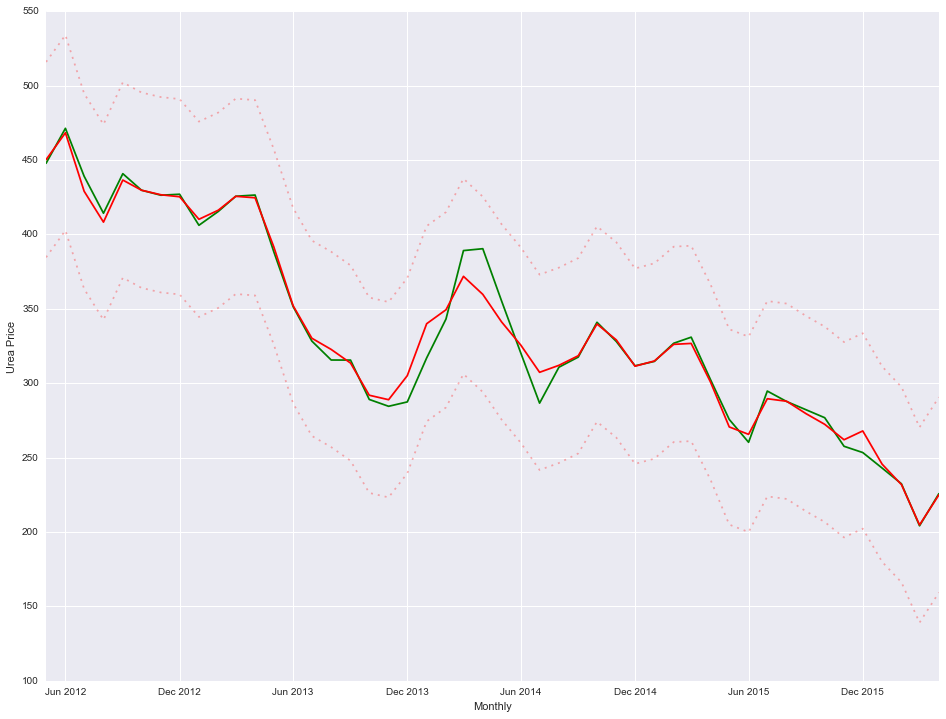

In [15]:
#basic plot of monthly avg actual vs predicted
import matplotlib.pyplot as plt
%matplotlib inline

x = (monthly_avg['Monthly_Date'])
y1 = (monthly_avg['Actual_Monthly_Avg'])
y2 = (monthly_avg['Pred_Monthly_Avg'])
lowerbound2 = (monthly_avg['Lower_Bound'])
upperbound2 = (monthly_avg['Upper_Bound'])

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,lowerbound2,'r--',dashes=(2,5),alpha=0.3)
plt.plot(x,upperbound2,'r--',dashes=(2,5),alpha=0.3)
#plt.fill_between(x,lowerbound2,upperbound2,color='red',alpha=0.5)
plt.xlabel('Monthly')
plt.ylabel('Urea Price')
plt.show()

In [49]:
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:1769]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:1769]
newpred2 

,latedate,Spotdollar,2monthcrude,2monthcorn
1461,3/1/2016,98.352,36.15,355.75
1462,3/2/2016,98.214,36.30,356.25
1463,3/3/2016,97.592,36.33,356.50
1464,3/4/2016,97.340,37.75,358.25
1465,3/5/2016,97.340,37.75,358.25
1466,3/6/2016,97.340,37.75,358.25
1467,3/7/2016,97.071,39.82,359.00
1468,3/8/2016,97.209,38.42,360.50
1469,3/9/2016,97.173,40.07,359.50
1470,3/10/2016,96.066,39.40,362.75


In [50]:
#new predictions
newpred_predicted = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
newpred2

,latedate,Spotdollar,2monthcrude,2monthcorn,Predicted Urea_Sec1_Suggest
0,3/1/2016,98.352,36.15,355.75,224.599
1,3/2/2016,98.214,36.3,356.25,227.082
2,3/3/2016,97.592,36.33,356.5,229.608
3,3/4/2016,97.34,37.75,358.25,228.87
4,3/5/2016,97.34,37.75,358.25,228.87
5,3/6/2016,97.34,37.75,358.25,228.87
6,3/7/2016,97.071,39.82,359,255.238
7,3/8/2016,97.209,38.42,360.5,232.387
8,3/9/2016,97.173,40.07,359.5,252.804
9,3/10/2016,96.066,39.4,362.75,262.981


In [51]:
#monthly predictions for may_16 to feb_17
may_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][0:31]
jun_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][31:61]
jul_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][61:92]
aug_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][92:122]
sep_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][122:153]
oct_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][153:184]
nov_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][184:214]
dec_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][214:245]
jan_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][245:275]
feb_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][275:306]

In [52]:
new_pred_monthly_avg = np.array([may_16['Predicted Urea_Sec1_Suggest'].mean(),jun_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_16['Predicted Urea_Sec1_Suggest'].mean(),aug_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_16['Predicted Urea_Sec1_Suggest'].mean(),oct_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_16['Predicted Urea_Sec1_Suggest'].mean(),dec_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_17['Predicted Urea_Sec1_Suggest'].mean(),feb_17['Predicted Urea_Sec1_Suggest'].mean()])
new_pred_monthly_avg

array([ 243.03661944,  226.43747592,  219.41105914,  220.40353889,
        216.03967742,  210.30032258,  207.96933333,  207.57806452,
        207.2055    ,  205.26032258])

In [53]:
new_pred_monthly_avg = pd.DataFrame(new_pred_monthly_avg)
new_monthly_date = ['5/2016','6/2016','7/2016','8/2016','9/2016','10/2016','11/2016','12/2016','1/2017','2/2017']
new_monthly_date = pd.to_datetime(new_monthly_date)
new_monthly_date.strftime('%b-%y')
new_monthly_date = pd.DataFrame(new_monthly_date)
new_monthly_date.columns = ['Monthly_Date']
new_upperbound = new_pred_monthly_avg + new_pred_monthly_avg.std()
new_lowerbound = new_pred_monthly_avg - new_pred_monthly_avg.std()
new_monthly_date['Pred_Monthly_Avg'] = new_pred_monthly_avg
new_monthly_date['Upper_Bound'] = new_upperbound
new_monthly_date['Lower_Bound'] = new_lowerbound
new_monthly_avg = new_monthly_date
print(new_monthly_avg.dtypes)
new_monthly_avg

Monthly_Date        datetime64[ns]
Pred_Monthly_Avg           float64
Upper_Bound                float64
Lower_Bound                float64
dtype: object


,Monthly_Date,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2016-05-01,243.036619,254.728080,231.345159
1,2016-06-01,226.437476,238.128936,214.746015
2,2016-07-01,219.411059,231.102520,207.719599
3,2016-08-01,220.403539,232.094999,208.712078
4,2016-09-01,216.039677,227.731138,204.348217
5,2016-10-01,210.300323,221.991783,198.608862
6,2016-11-01,207.969333,219.660794,196.277873
7,2016-12-01,207.578065,219.269525,195.886604
8,2017-01-01,207.205500,218.896960,195.514040
9,2017-02-01,205.260323,216.951783,193.568862


In [54]:
frames = [monthly_date,new_monthly_date]
combined = pd.concat(frames)
combined

,Actual_Monthly_Avg,Lower_Bound,Monthly_Date,Pred_Monthly_Avg,Upper_Bound
0,447.772727,384.164903,2012-05-01,449.842319,515.519735
1,471.250000,403.455732,2012-06-01,469.133148,534.810564
2,439.043478,362.609532,2012-07-01,428.286948,493.964363
3,414.190476,343.026140,2012-08-01,408.703555,474.380971
4,440.772727,371.516038,2012-09-01,437.193454,502.870870
5,429.652174,364.585365,2012-10-01,430.262781,495.940197
6,426.300000,361.219194,2012-11-01,426.896610,492.574026
7,426.956522,359.413820,2012-12-01,425.091236,490.768652
8,406.100000,344.358088,2013-01-01,410.035504,475.712919
9,415.388889,349.997381,2013-02-01,415.674797,481.352213


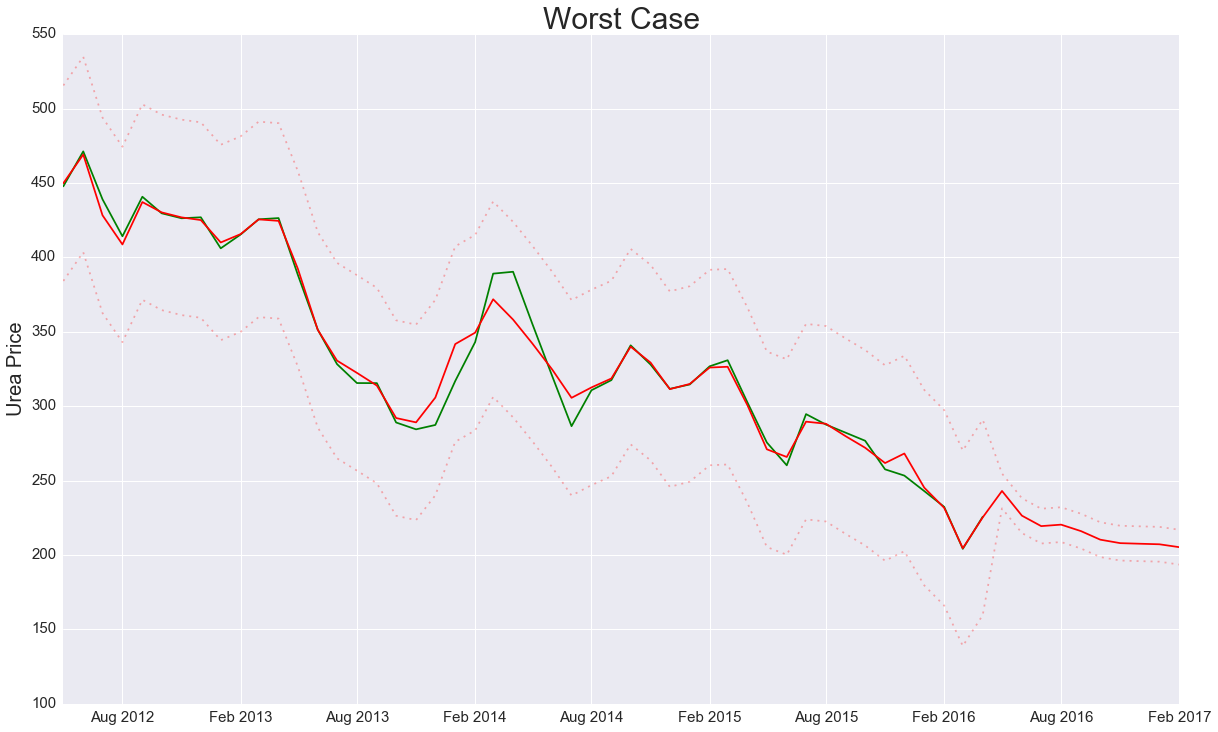

In [55]:

x = (combined['Monthly_Date'])
y1 = (combined['Actual_Monthly_Avg'])
y2 = (combined['Pred_Monthly_Avg'])
lowerboundcom = (combined['Lower_Bound'])
upperboundcom = (combined['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,lowerboundcom,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x,upperboundcom,'r--',dashes=(2,5),alpha=0.3)

#plt.ylabel('Urea Price')
ax.set_title('Worst Case', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

## Compare daily 

In [23]:
sec1whole = sec1new
sec1whole['Predicted Urea_Sec1_Suggest'].describe()

count    987.000000
mean     336.637210
std       66.082462
min      193.810000
25%      289.188770
50%      324.025865
75%      397.238085
max      504.662500
Name: Predicted Urea_Sec1_Suggest, dtype: float64

In [24]:
upperbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] + sec1whole['Predicted Urea_Sec1_Suggest'].std()
lowerbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] - sec1whole['Predicted Urea_Sec1_Suggest'].std()
sec1whole['Upper_Bound'] = upperbound_whole
sec1whole['Lower_Bound'] = lowerbound_whole
sec1whole

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest,Upper_Bound,Lower_Bound
0,3/1/2012,78.789,109.27,654,406,418.167500,484.249962,352.085038
1,3/2/2012,79.403,107.17,655,411,423.596929,489.679391,357.514466
2,3/5/2012,79.3,107.18,660.75,409,429.556875,495.639337,363.474413
3,3/6/2012,79.866,105.21,654,425,433.058984,499.141447,366.976522
4,3/7/2012,79.712,106.65,638.75,430,442.779000,508.861462,376.696538
5,3/8/2012,79.139,107.06,635.5,430,441.636000,507.718462,375.553538
6,3/9/2012,80.041,107.87,645,429,477.685000,543.767462,411.602538
7,3/12/2012,79.89,106.84,659.5,433,432.162994,498.245456,366.080532
8,3/13/2012,80.193,107.24,662,431,431.237810,497.320272,365.155347
9,3/14/2012,80.565,105.95,658.75,430,422.842450,488.924913,356.759988


In [25]:
#new predictions daily
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:1769]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:1769]
newpred_predicted_whole = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred_whole = pd.DataFrame(newpred_predicted_whole)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred_whole
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
upperbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] + newpred2['Predicted Urea_Sec1_Suggest'].std()
lowerbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] - newpred2['Predicted Urea_Sec1_Suggest'].std()
newpred2['Upper_Bound'] = upperbound_wholenew
newpred2['Lower_Bound'] = lowerbound_wholenew
newpred2['Predicted Urea_Sec1_Suggest'].mean()


215.94018748290532

In [26]:
#this shows that I need to change the lastdate object to a date
frames_whole = [sec1whole,newpred2]
combined_whole = pd.concat(frames_whole)
combined_whole.dtypes

2monthcorn                     object
2monthcrude                    object
2monthurea                     object
Lower_Bound                    object
Predicted Urea_Sec1_Suggest    object
Spotdollar                     object
Upper_Bound                    object
latedate                       object
dtype: object

In [27]:
#changes lastdate column to datetime format
from datetime import datetime
new_date = combined_whole[['latedate']]
combined_whole['latedate'] = pd.to_datetime(combined_whole['latedate'])
print(new_date.dtypes)
combined_whole.tail()


latedate    object
dtype: object


,2monthcorn,2monthcrude,2monthurea,Lower_Bound,Predicted Urea_Sec1_Suggest,Spotdollar,Upper_Bound,latedate
301,332.6,30.1,NaN,191.221,203.17,109.8,215.119,2016-12-27
302,332.4,30.1,NaN,191.221,203.17,109.9,215.119,2016-12-28
303,332.3,30.1,NaN,191.221,203.17,109.9,215.119,2016-12-29
304,332.1,30,NaN,191.221,203.17,110,215.119,2016-12-30
305,332,30,NaN,191.221,203.17,110,215.119,2016-12-31


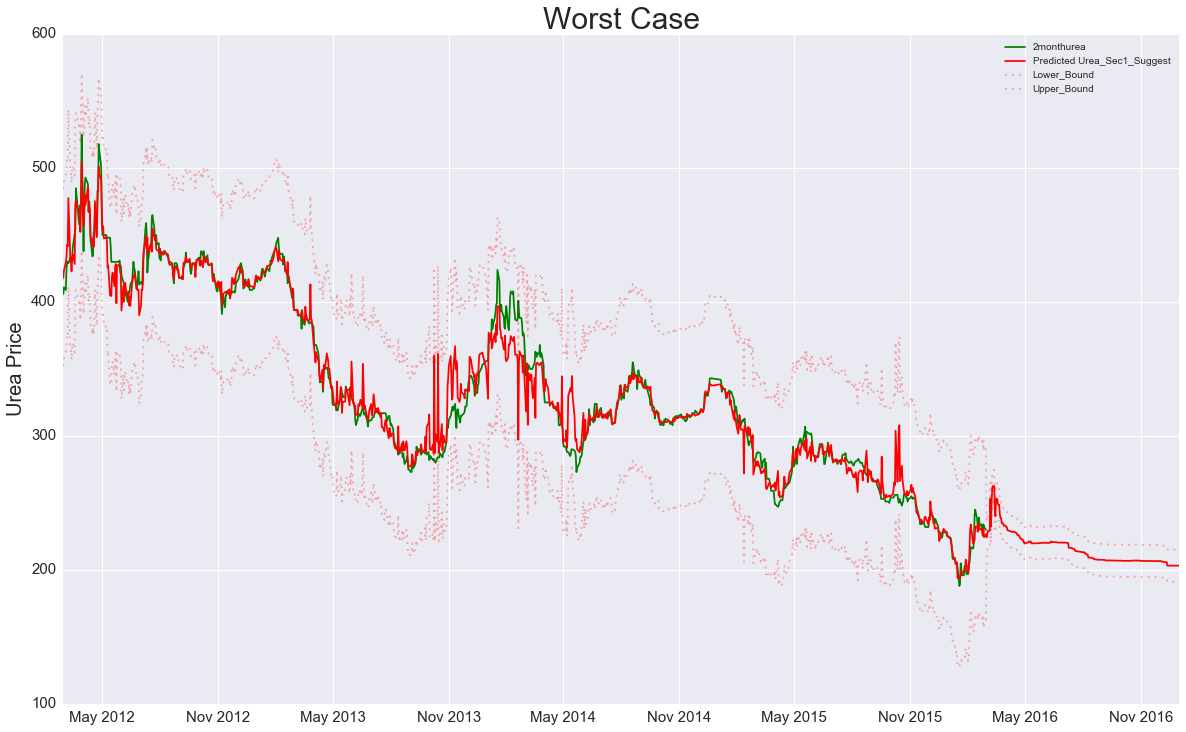

In [31]:
x_whole = (combined_whole['latedate'])
y1_whole = (combined_whole['2monthurea'])
y2_whole = (combined_whole['Predicted Urea_Sec1_Suggest'])
lowerbound_whole = (combined_whole['Lower_Bound'])
upperbound_whole = (combined_whole['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')
ax.plot(x_whole,lowerbound_whole,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x_whole,upperbound_whole,'r--',dashes=(2,5),alpha=0.3)

ax.set_title('Worst Case', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
#ax.set_xticklabels(x_whole,rotation=30)
plt.show()